In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
df = pd.read_csv ('crypto/BTC-USD.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-16,416.888000,417.686005,415.911987,417.010986,417.010986,65185800
1,2016-03-17,417.889008,420.997009,417.889008,420.621002,420.621002,83528600
2,2016-03-18,420.546997,420.546997,406.136993,409.548004,409.548004,104940000
3,2016-03-19,409.265015,410.984009,407.230011,410.444000,410.444000,58423000
4,2016-03-20,410.401001,414.625000,410.401001,413.755005,413.755005,45947900


In [3]:
df = df[["Date", "Open", "High", "Low", "Close", "Volume", "Adj Close"]]
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-03-16,416.888000,417.686005,415.911987,417.010986,65185800,417.010986
1,2016-03-17,417.889008,420.997009,417.889008,420.621002,83528600,420.621002
2,2016-03-18,420.546997,420.546997,406.136993,409.548004,104940000,409.548004
3,2016-03-19,409.265015,410.984009,407.230011,410.444000,58423000,410.444000
4,2016-03-20,410.401001,414.625000,410.401001,413.755005,45947900,413.755005
...,...,...,...,...,...,...,...
1818,2021-03-12,57821.218750,57996.621094,55376.648438,57332.089844,55689944702,57332.089844
1819,2021-03-13,57343.371094,61683.863281,56217.972656,61243.085938,60669829814,61243.085938
1820,2021-03-14,61221.132812,61597.917969,59302.316406,59302.316406,43901225564,59302.316406
1821,2021-03-15,59267.429688,60540.992188,55393.164062,55907.199219,66419369890,55907.199219


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
len(df)

1823

In [6]:
output = df.iloc[0:1823,6:7].values
output = np.array(output)
output

array([[  417.01098633],
       [  420.6210022 ],
       [  409.54800415],
       ...,
       [59302.31640625],
       [55907.19921875],
       [56804.90234375]])

In [7]:
inputs = df.iloc[0:1823,1:6].values
inputs = np.array(inputs)
inputs

array([[4.16888000e+02, 4.17686005e+02, 4.15911987e+02, 4.17010986e+02,
        6.51858000e+07],
       [4.17889008e+02, 4.20997009e+02, 4.17889008e+02, 4.20621002e+02,
        8.35286000e+07],
       [4.20546997e+02, 4.20546997e+02, 4.06136993e+02, 4.09548004e+02,
        1.04940000e+08],
       ...,
       [6.12211328e+04, 6.15979180e+04, 5.93023164e+04, 5.93023164e+04,
        4.39012256e+10],
       [5.92674297e+04, 6.05409922e+04, 5.53931641e+04, 5.59071992e+04,
        6.64193699e+10],
       [5.58407852e+04, 5.68331797e+04, 5.35550273e+04, 5.68049023e+04,
        5.97497986e+10]])

In [12]:
###READ I N 1823 ROWS OF DATA, OUTPUT COLUMN 5-6 IS OUTPUT since data file cosider here have 1823 rows
output = df.iloc[0:1823,6:7].values
output = np.array(output)
###READ IN 1823 ROWS OF DATA, INPUT COLUMN 1-5 IS OUTPUT
inputs = df.iloc[0:1823,1:6].values
inputs = np.array(inputs)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(inputs)
scaled_data = np.array(scaled_data)
scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler2.fit_transform(output)
scaled_data2 = np.array(scaled_data2)
scaled_data = np.reshape(scaled_data,(scaled_data.shape[0],scaled_data.shape[1],1))
X_train = scaled_data
Y_train = scaled_data2

In [13]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, epochs = 10, batch_size = 32) 

Epoch 1/10
57/57 [==============================] - 2s 43ms/step - loss: 0.0101
Epoch 2/10
57/57 [==============================] - 2s 43ms/step - loss: 7.6594e-04
Epoch 3/10
57/57 [==============================] - 3s 56ms/step - loss: 6.9600e-04: 0s - loss: 7.279
Epoch 4/10
57/57 [==============================] - 3s 51ms/step - loss: 4.9814e-04
Epoch 5/10
57/57 [==============================] - 3s 44ms/step - loss: 6.9771e-04
Epoch 6/10
57/57 [==============================] - 3s 48ms/step - loss: 6.8827e-04
Epoch 7/10
57/57 [==============================] - 3s 48ms/step - loss: 6.0992e-04
Epoch 8/10
57/57 [==============================] - 3s 45ms/step - loss: 4.4686e-04
Epoch 9/10
57/57 [==============================] - 2s 43ms/step - loss: 5.0673e-04
Epoch 10/10
57/57 [==============================] - 2s 41ms/step - loss: 3.5606e-04


In [20]:
X_test

array([[[ 7910.08984375],
        [ 7950.81445312],
        [ 7642.8125    ],
        [ 7911.43017578],
        [ 7911.43017578]],

       [[ 7913.61621094],
        [ 7929.11621094],
        [ 4860.35400391],
        [ 4970.78808594],
        [ 4970.78808594]],

       [[ 5017.83105469],
        [ 5838.11474609],
        [ 4106.98095703],
        [ 5563.70703125],
        [ 5563.70703125]],

       ...,

       [[61221.1328125 ],
        [61597.91796875],
        [59302.31640625],
        [59302.31640625],
        [59302.31640625]],

       [[59267.4296875 ],
        [60540.9921875 ],
        [55393.1640625 ],
        [55907.19921875],
        [55907.19921875]],

       [[55840.78515625],
        [56833.1796875 ],
        [53555.02734375],
        [56804.90234375],
        [56804.90234375]]])

In [25]:
# Part 3 - Making the predictions and visualising the results
df99 = pd.read_csv ('crypto/BTC-USD.csv')
Inp=df99.iloc[0:1823,1:6].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled99 = sc.fit_transform(Inp)
#df2 = pd.read_csv('crypto/BTC-USD.csv')
#inputs2 = df2.iloc[1456:1840,1:6].values
X_test = np.array(training_set_scaled99)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#X_test =  tf.convert_to_tensor(X_test)
predicted_stock_price = regressor.predict(X_test)
#predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#plt.plot(real_stock_price, color = 'red', label = 'Bitcoin Price')

In [23]:
predicted_stock_price

array([[0.00318466],
       [0.0032903 ],
       [0.00319532],
       ...,
       [0.46264356],
       [0.42518318],
       [0.4208021 ]], dtype=float32)

In [211]:
df2 = pd.read_csv('crypto/BTC-USD.csv')
inputs2 = df2.iloc[1823:1840,1:5].values
X_test = np.array(inputs2)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test 

array([], shape=(0, 4, 1), dtype=float64)

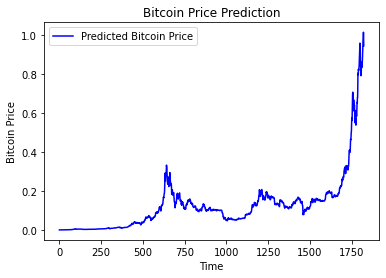

In [26]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()